# Object Detection on custom dataset using YOLOV8

In [ ]:
#import necessary libraries
!pip install ultralytics
!pip install roboflow
import os
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Image
from IPython import display
display.clear_output()
from roboflow import Roboflow

In [ ]:
!nvidia-smi
!yolo checks

Sat Jan 27 00:49:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:

!yolo task=detect mode=predict model=yolov8n.pt conf=.25 source='/content/bus.jpg'

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 125.5ms
Speed: 4.3ms preprocess, 125.5ms inference, 609.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


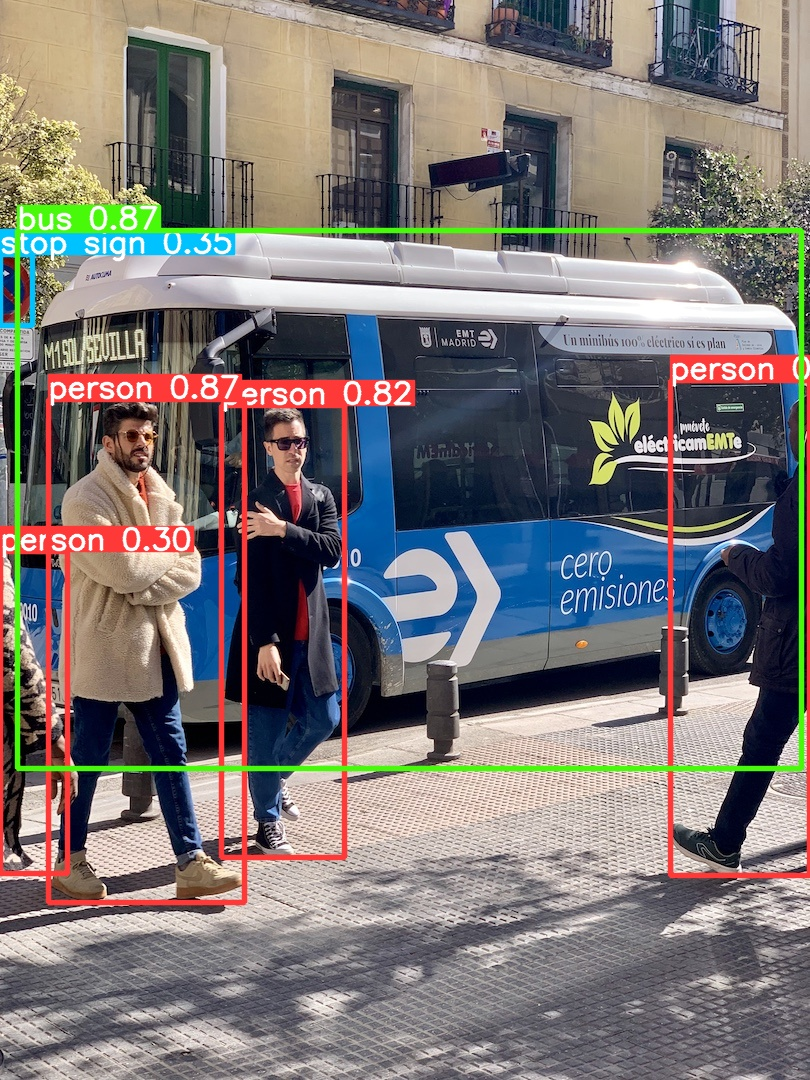

In [ ]:
#visualize results
#the results are stored in colab workspace just copy the path and using Ipyhtons module Image visualize the detections
Image(filename='runs/detect/predict/bus.jpg')

In [ ]:
#create a working directory
HOME=os.getcwd()
#make the directory our working space
!mkdir {HOME}/dataset
%cd {HOME}/dataset



/content/dataset/dataset


# Roboflow
If you want to create a custom datset for object detection based on what you want go ahead and use an annotation tool. There  are several annotation tools such as cvat or roboflow, for creating object instances and annotating them.Choose one that works best for you.
In this case i used roboflow, go ahead and check out its tutorial https://app.roboflow.com

In [ ]:
###I created a new project and imported a number oof aerial images the annotated the dataset.
# You can contribute to this project by annotating the data so we can get better results since
# the project is public and you can use it to train your model in object detection
https://universe.roboflow.com/kiboi/dataset1-fopjv

#copy the code snippet provided after exporting the dataset in yolov8 format
rf = Roboflow(api_key="YOUR_CODE")
project = rf.workspace("kiboi").project("dataset1-fopjv")
dataset = project.version(2).download("yolov8")

# Model Training
set the current directory to our home directory.
When using colab notice that the annotated dataset from roboflow was added to our work space, go ahead and inspect it. make sure you have both images and labels for the train,valid and test data.Also the most import file is the yaml file that reads all the train,test and val data folders. Check out https://docs.ultralytics.com/datasets/detect for dataset configuration.
Go ahead and train the model. For more info visit https://docs.ultralytics.com

In [ ]:
!cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=45 imgsz=640

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/dataset1-2/data.yaml, epochs=45, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

See that with every epoch our model improved its accuracyas it is able to learn with the dataset I fed it. for improved accuracy ensure you have more data  in your custom data.

In [ ]:
!ls /content/dataset/runs/detect/train/

args.yaml					    PR_curve.png	train_batch316.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch317.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1706316795.2f4e05812114.1474.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch315.jpg


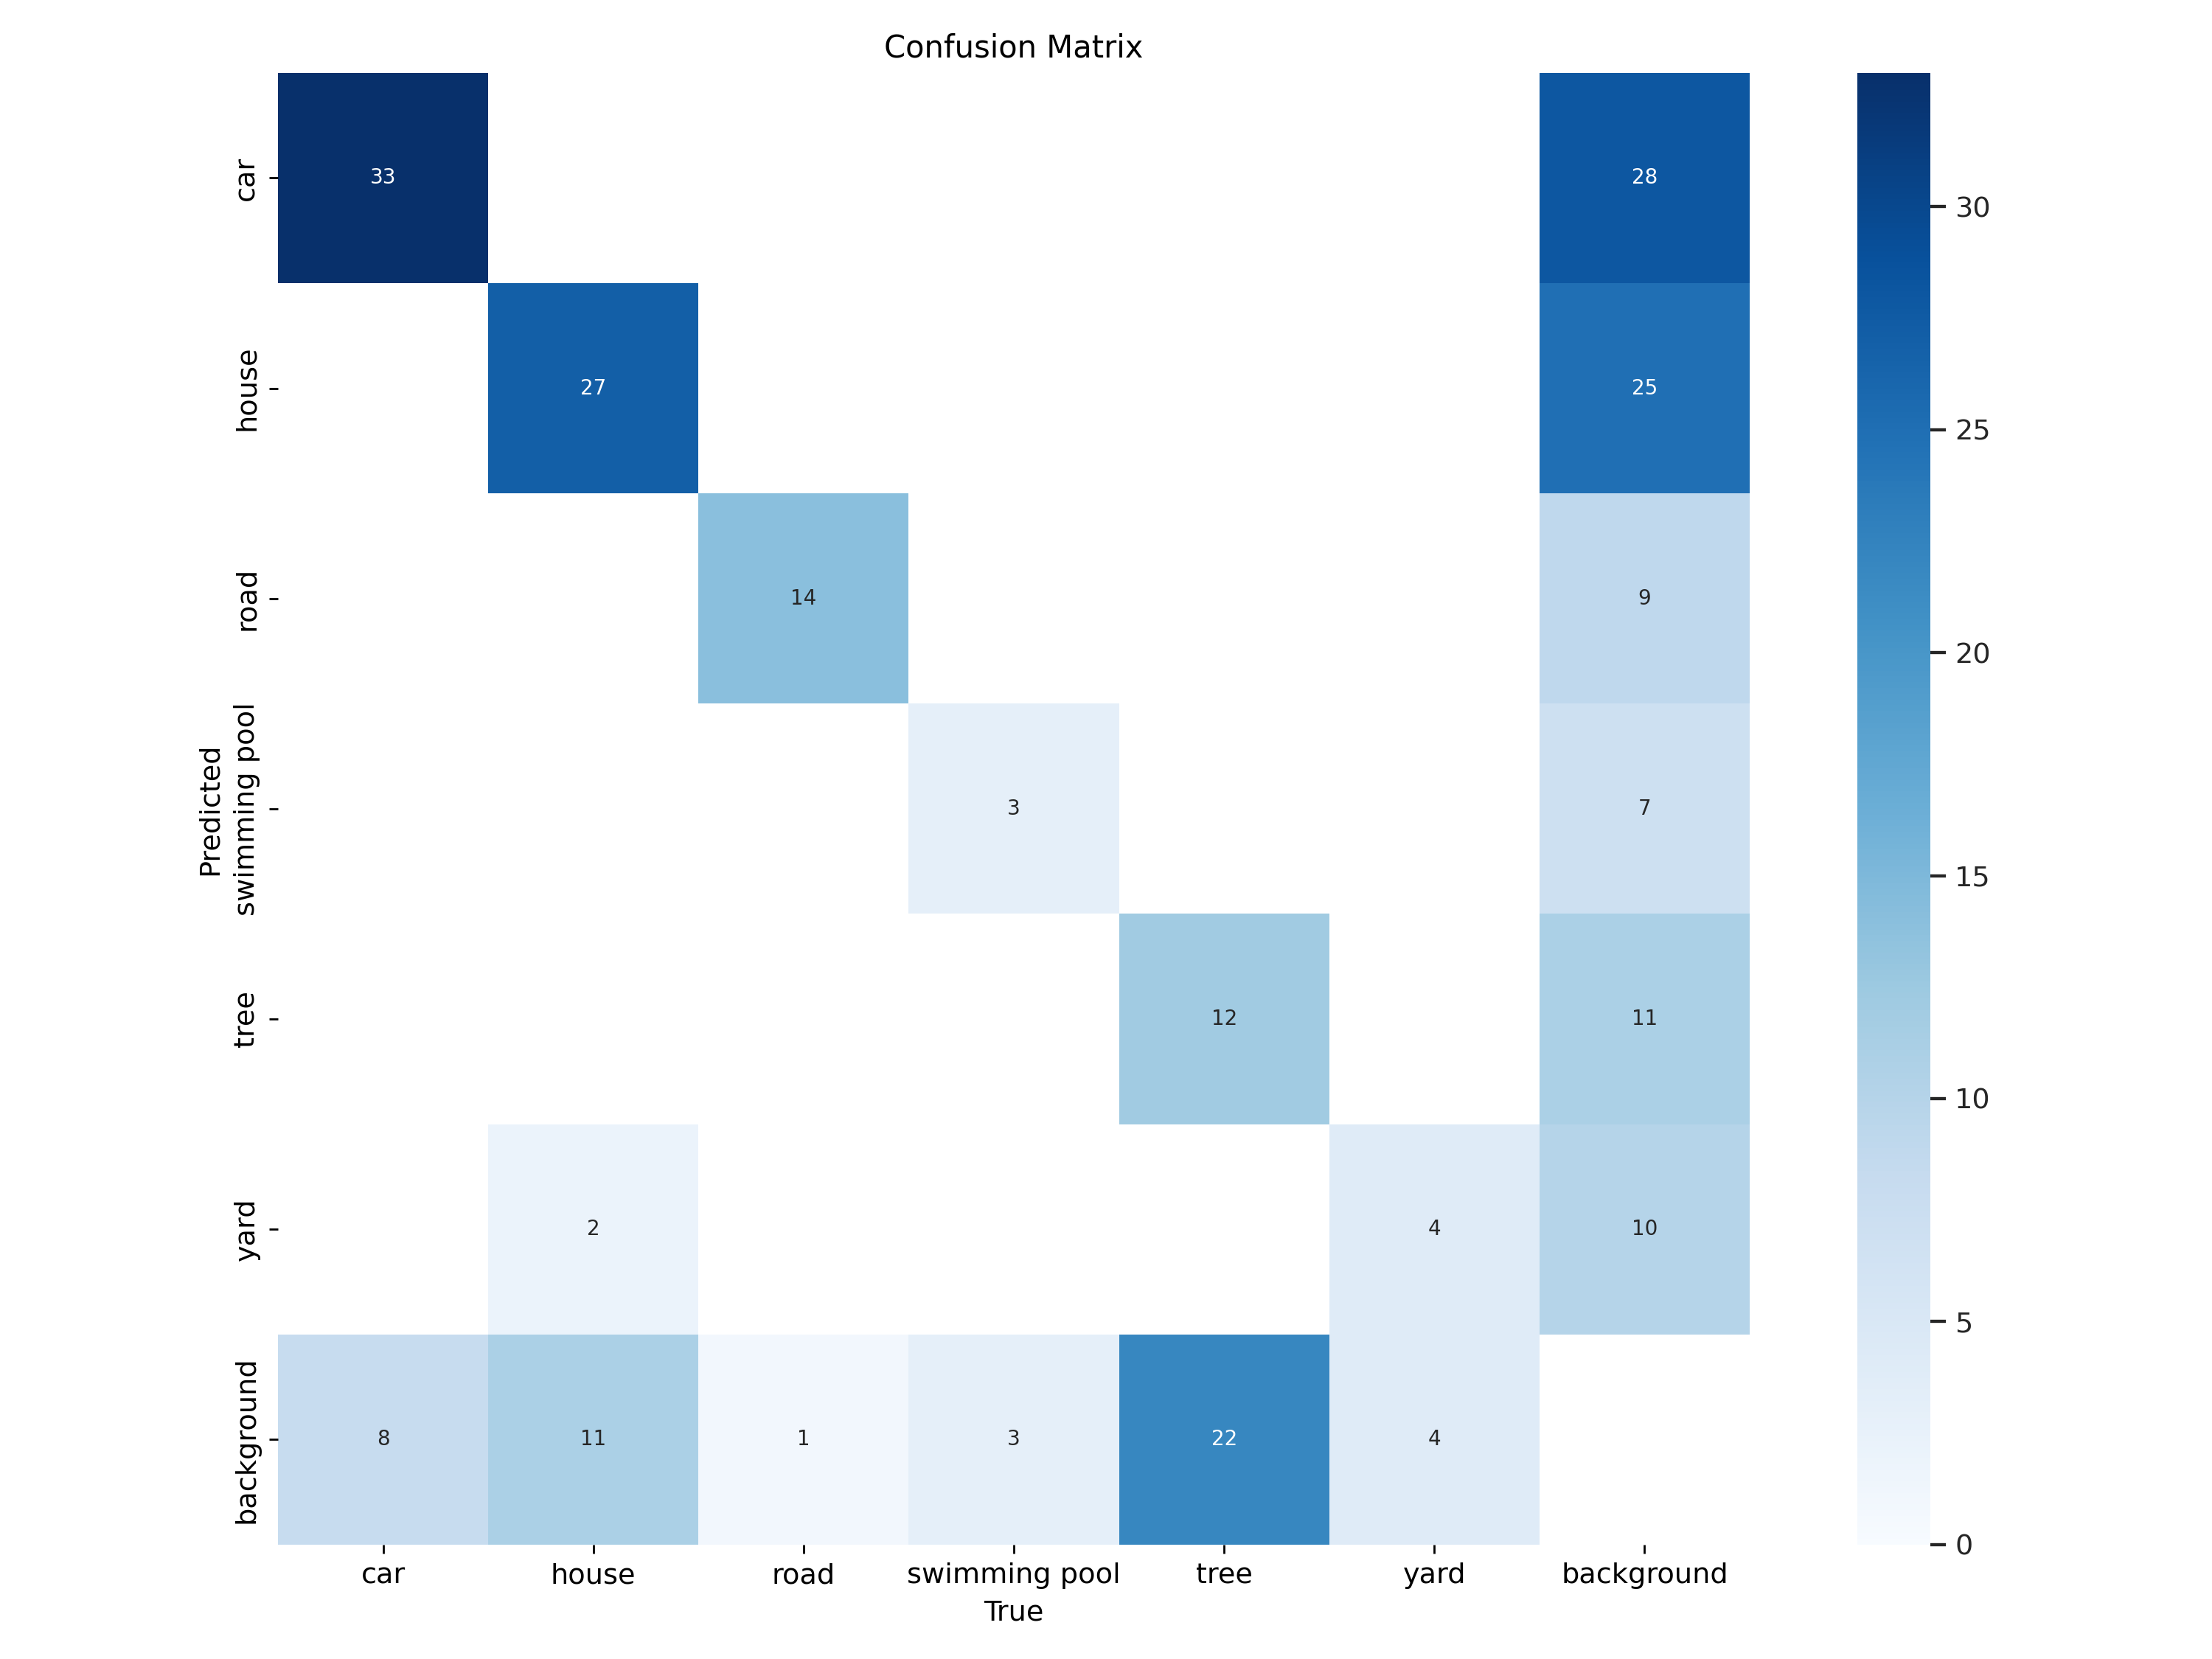

In [ ]:
#confusion matrix.

!cd {HOME}
Image(filename='/content/dataset/runs/detect/train/confusion_matrix.png',width=600)

Go ahead and analyze the models metrics. Asyou can see with  every epoch the model seems to learn from the data and is able to detect object with better accuracies.
Here our mean Average Precision(mAP) metric is a measure of how well an object detection model can identify the presence of relevant objects in images and classify those objects into relevant classes.It is improving and so our model would improve its prediction if fed with more custom datasets.

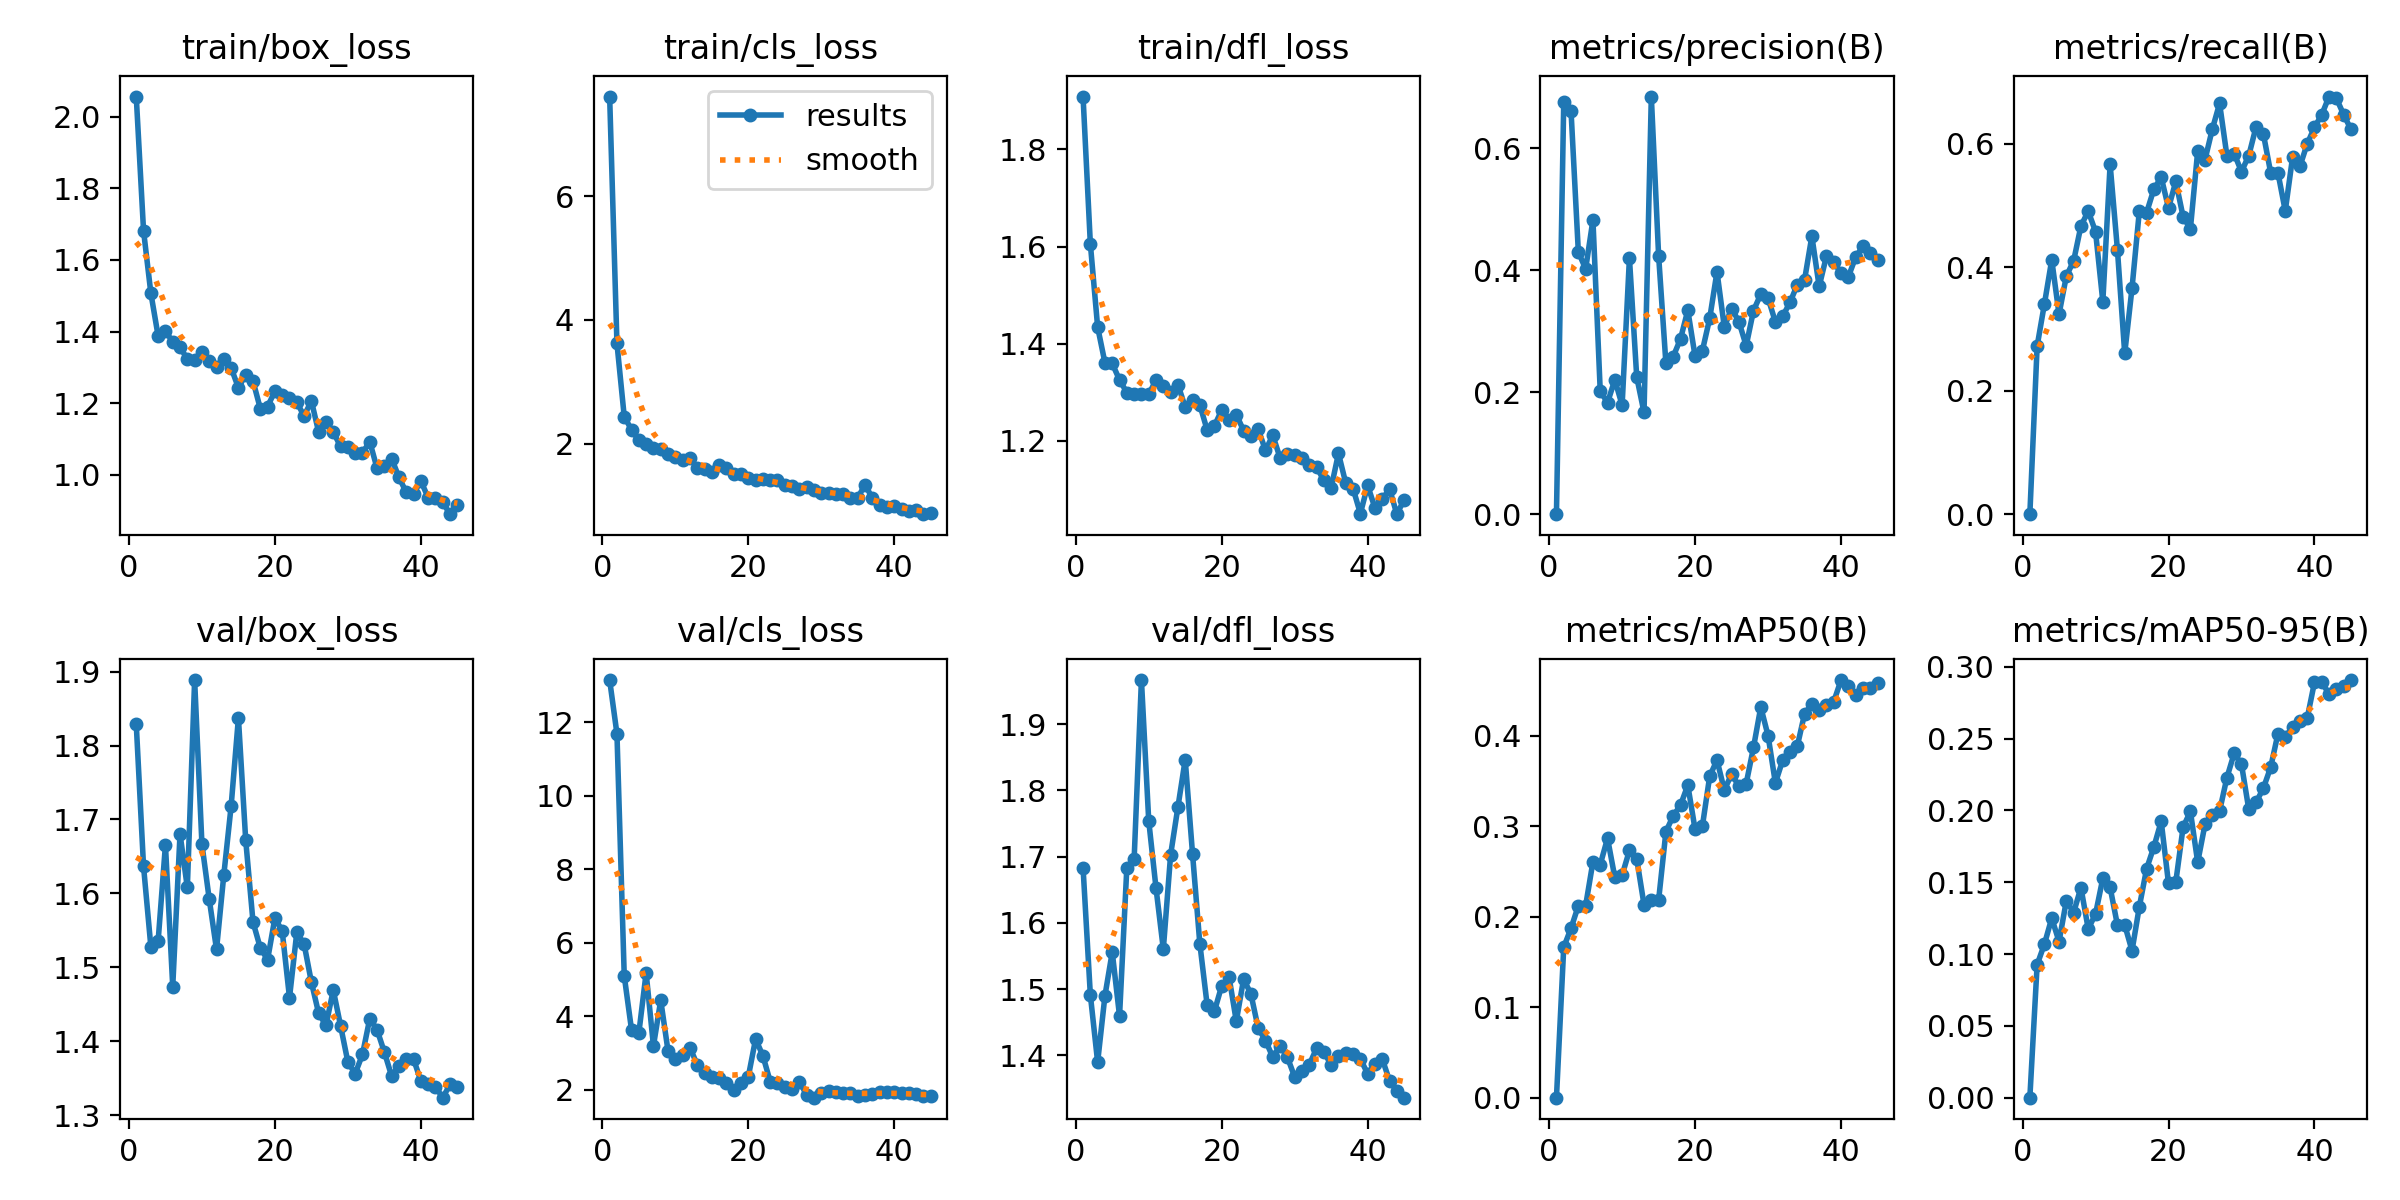

In [ ]:
!cd {HOME}

Image(filename='/content/dataset/runs/detect/train/results.png',width=600)

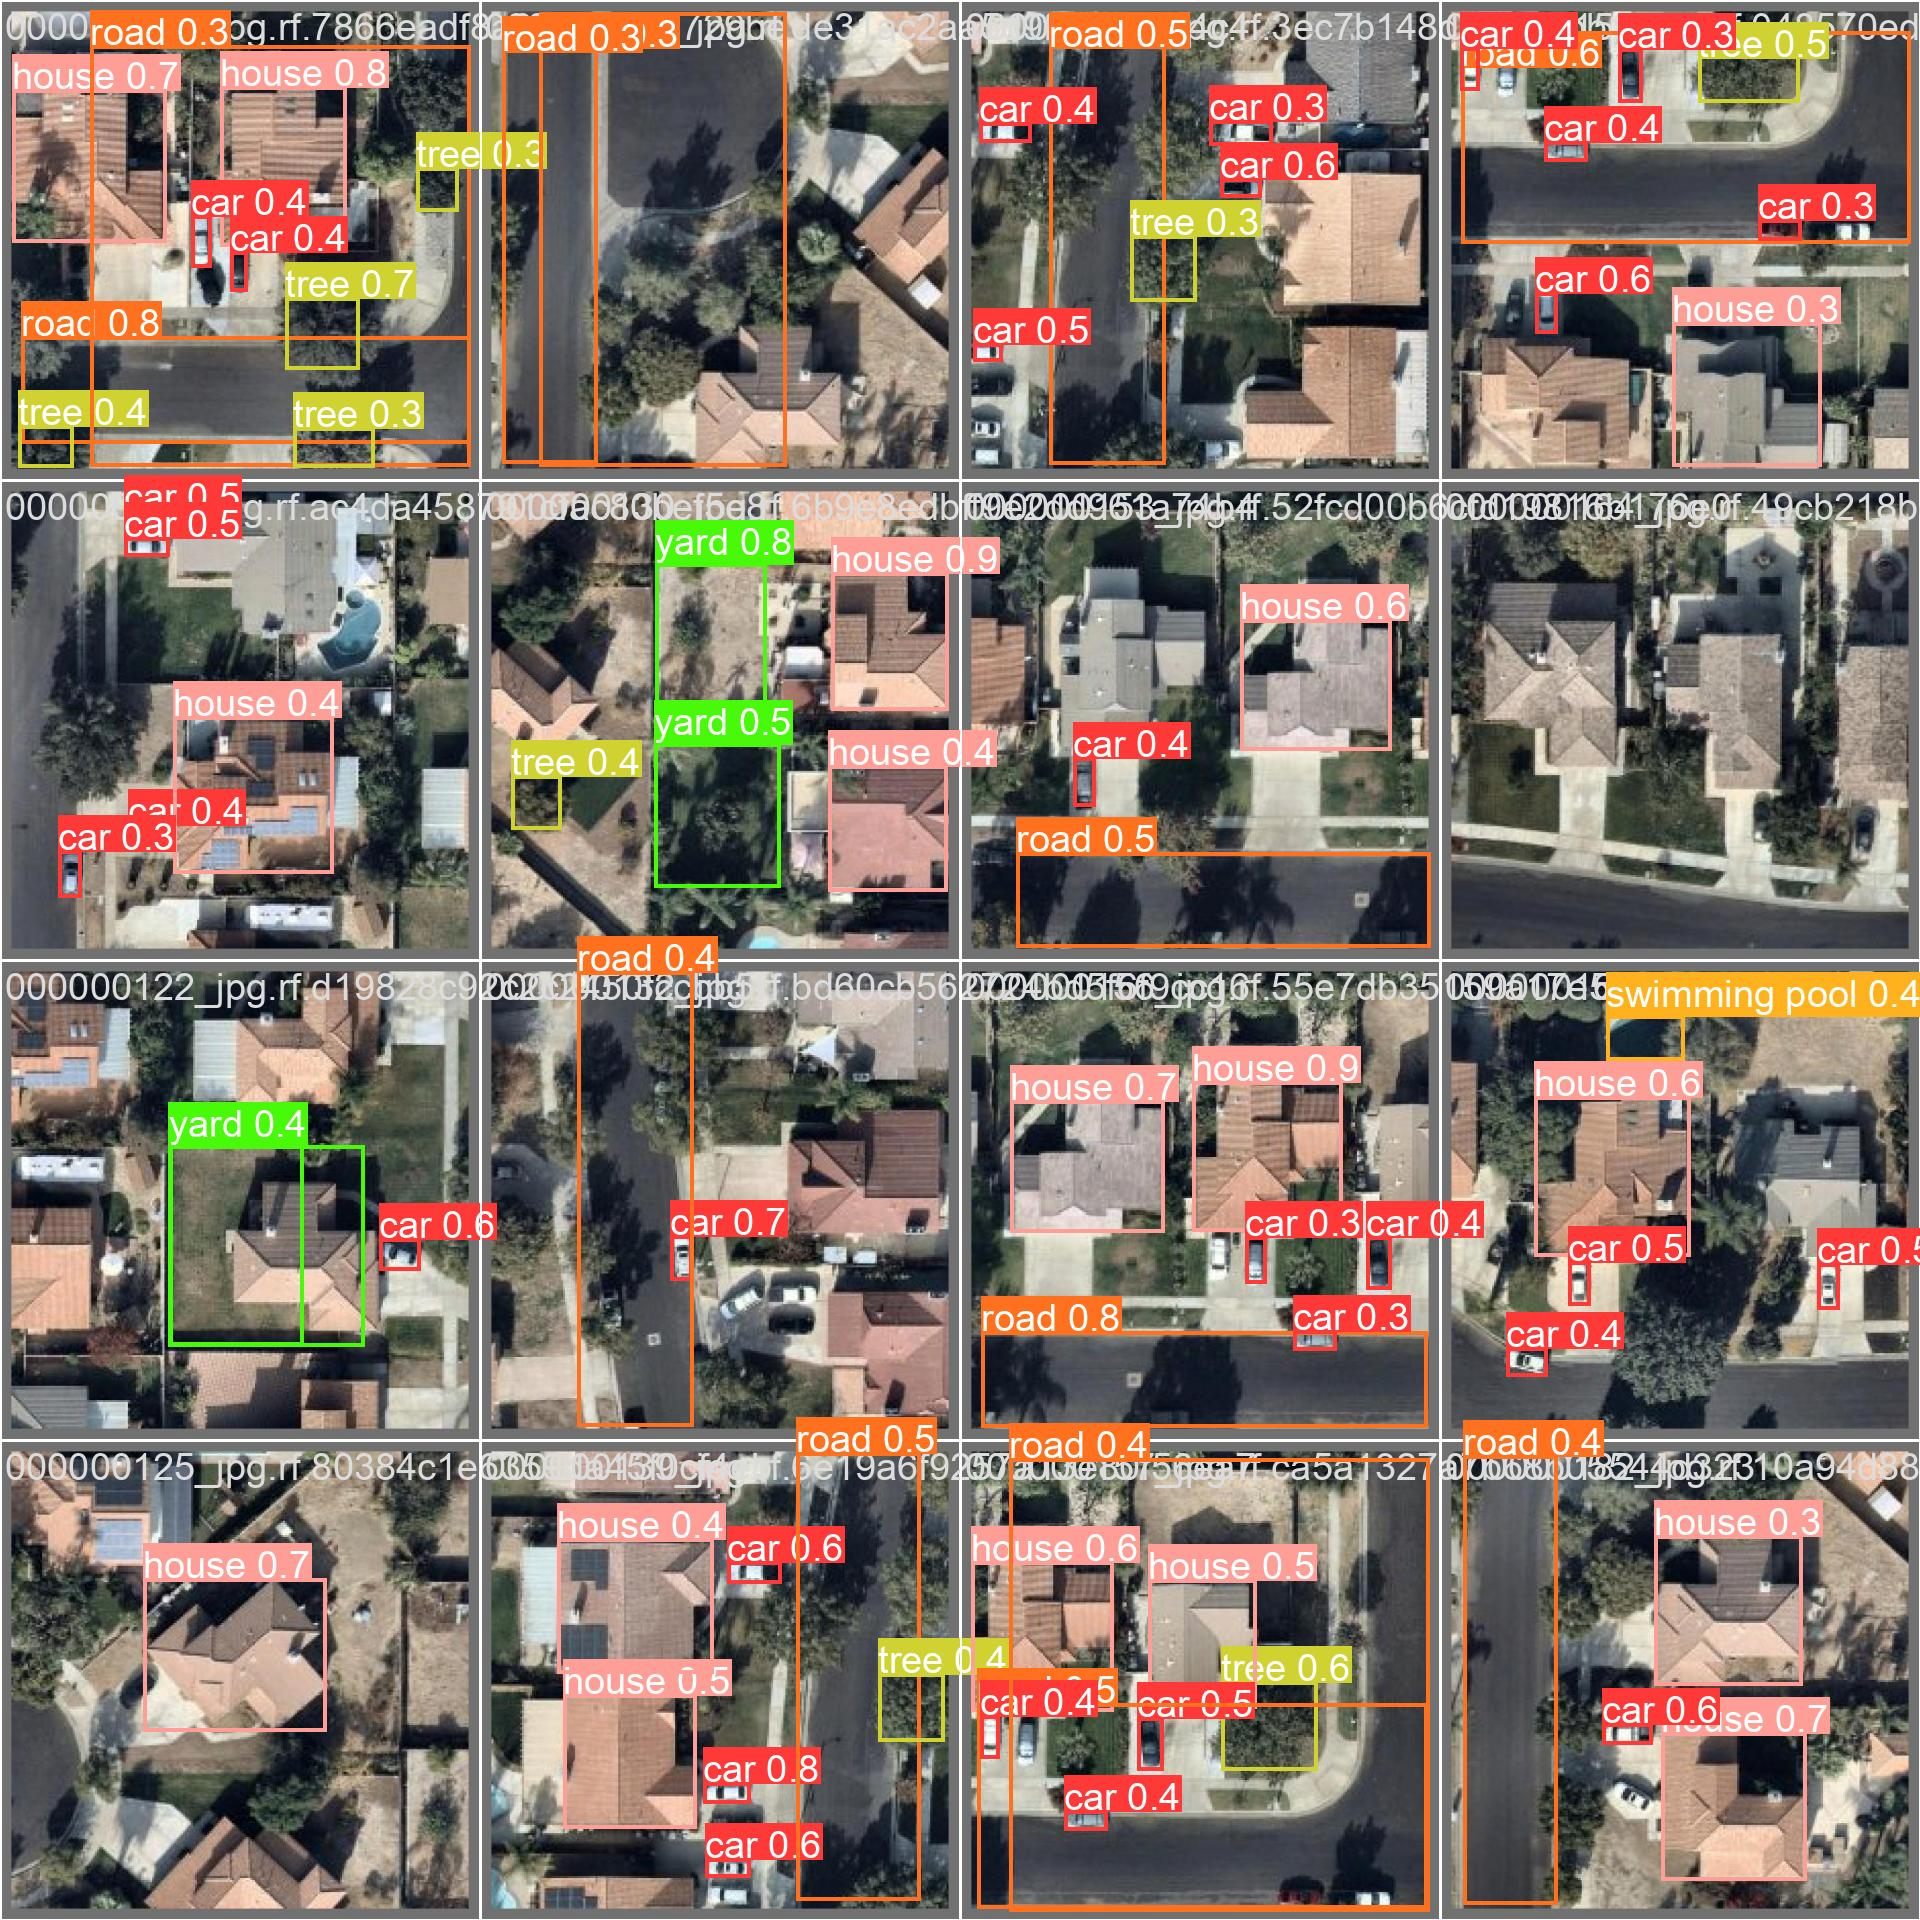

In [ ]:
#Go ahead and visualize the model's detection instances
!cd {HOME}
Image(filename='/content/dataset/runs/detect/train/val_batch0_pred.jpg',width=600)